## Multi Instrument Plot
This tool downloads and visualizes time-series data of various instruments of a selected spacecraft including solar energetic particle intensities, solar wind plasma and magnetic field data. 

Selected remote-sensing observations such as radio spectrograms or X-ray light curves are also available.

#### Import tools and display options
GOES manual satellite selection: check to manually pick GOES satellite during data loading. When left unchecked, the highest numbered satellite is picked automatically.

Averaging options: "Averaging" averages particle data (except L1 which has its own options), "MAG averaging" averages magnetic field and plasma/solar wind quantities, and "STIX/XRS averaging" averages SolO/STIX and GOES/XRS. 0 minutes averaging means original cadence.

STIX light travel time correction means that the data are time-shifted to a distance of 1 AU. Everything else is in local time of the spacecraft.

In [ ]:
import os
import datetime as dt
import matplotlib.pyplot as plt

from seppy.util import jupyterhub_data_path

import multi_inst_plots as m

In [ ]:
m.options.show()

#### Data directory

Define where to download files. Running this cell will set it to \<current directory\>/data, or if run on the project's JupyterHub server, set it to a common data folder in the base directory. Setting to None will use sunpy's default data directory. 

In [ ]:
m.options.path = f"{os.getcwd()}{os.sep}data"
m.options.path = jupyterhub_data_path(m.options.path)

#### Load data
Run this cell whenever spacecraft, instruments or dates are re-selected. Non-averaged data and metadata are returned should you want to use them for other purposes.

In [ ]:
data, metadata = m.load_data()

#### Energy channel selection
Print out energy ranges for each channel and choose the indices of the channels you want to include in your plot with `m.energy_channel_selection()`. Use `m.range_selection()` for easy range selection. Alternatively, you can choose them manually with the widgets: click+drag cursor or Shift+click for ranges, Ctrl/Cmd + click for individual channels.

In [ ]:
# Display energy channel ranges and corresponding selection widgets
m.energy_channel_selection()

In [ ]:
# Pass e.g. low_e_start=0, low_p_stop=24, low_p_step=3, high_p_start=5 as arguments. Not every argument is required, 
# and the ordering doesn't matter either. Leave empty for a nice selection covering the full range.
m.range_selection() 

#### Define plot range

You can optionally define a smaller plotting range here. Values have to be valid datetime objects and within loaded time range. Set to None for 00:00 - 00:00.

In [ ]:
m.options.plot_start = None # dt.datetime(2022, 3, 15, 0, 0)
m.options.plot_end =  None # dt.datetime(2022, 3, 17, 0, 0)

#### Plot data
Figure and axes are returned for further tweaking capability.

Chosen energy channels:
EPI-Hi HET protons: (0, 2, 4, 6, 8, 10, 12, 14) , 8
EPI-Hi HET electrons: (0, 3, 6, 9, 12, 15, 18) , 7
EPI-Lo PE electrons: (0, 1, 2, 3, 4, 5) , 6
Plotting Parker Solar Probe data for timerange 2022-03-14 00:00:00 - 2022-03-15 23:59:59


2025-06-17 14:22:59 - sunpy - INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) (-96)


INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) (-96) [sunpy.coordinates.ephemeris]


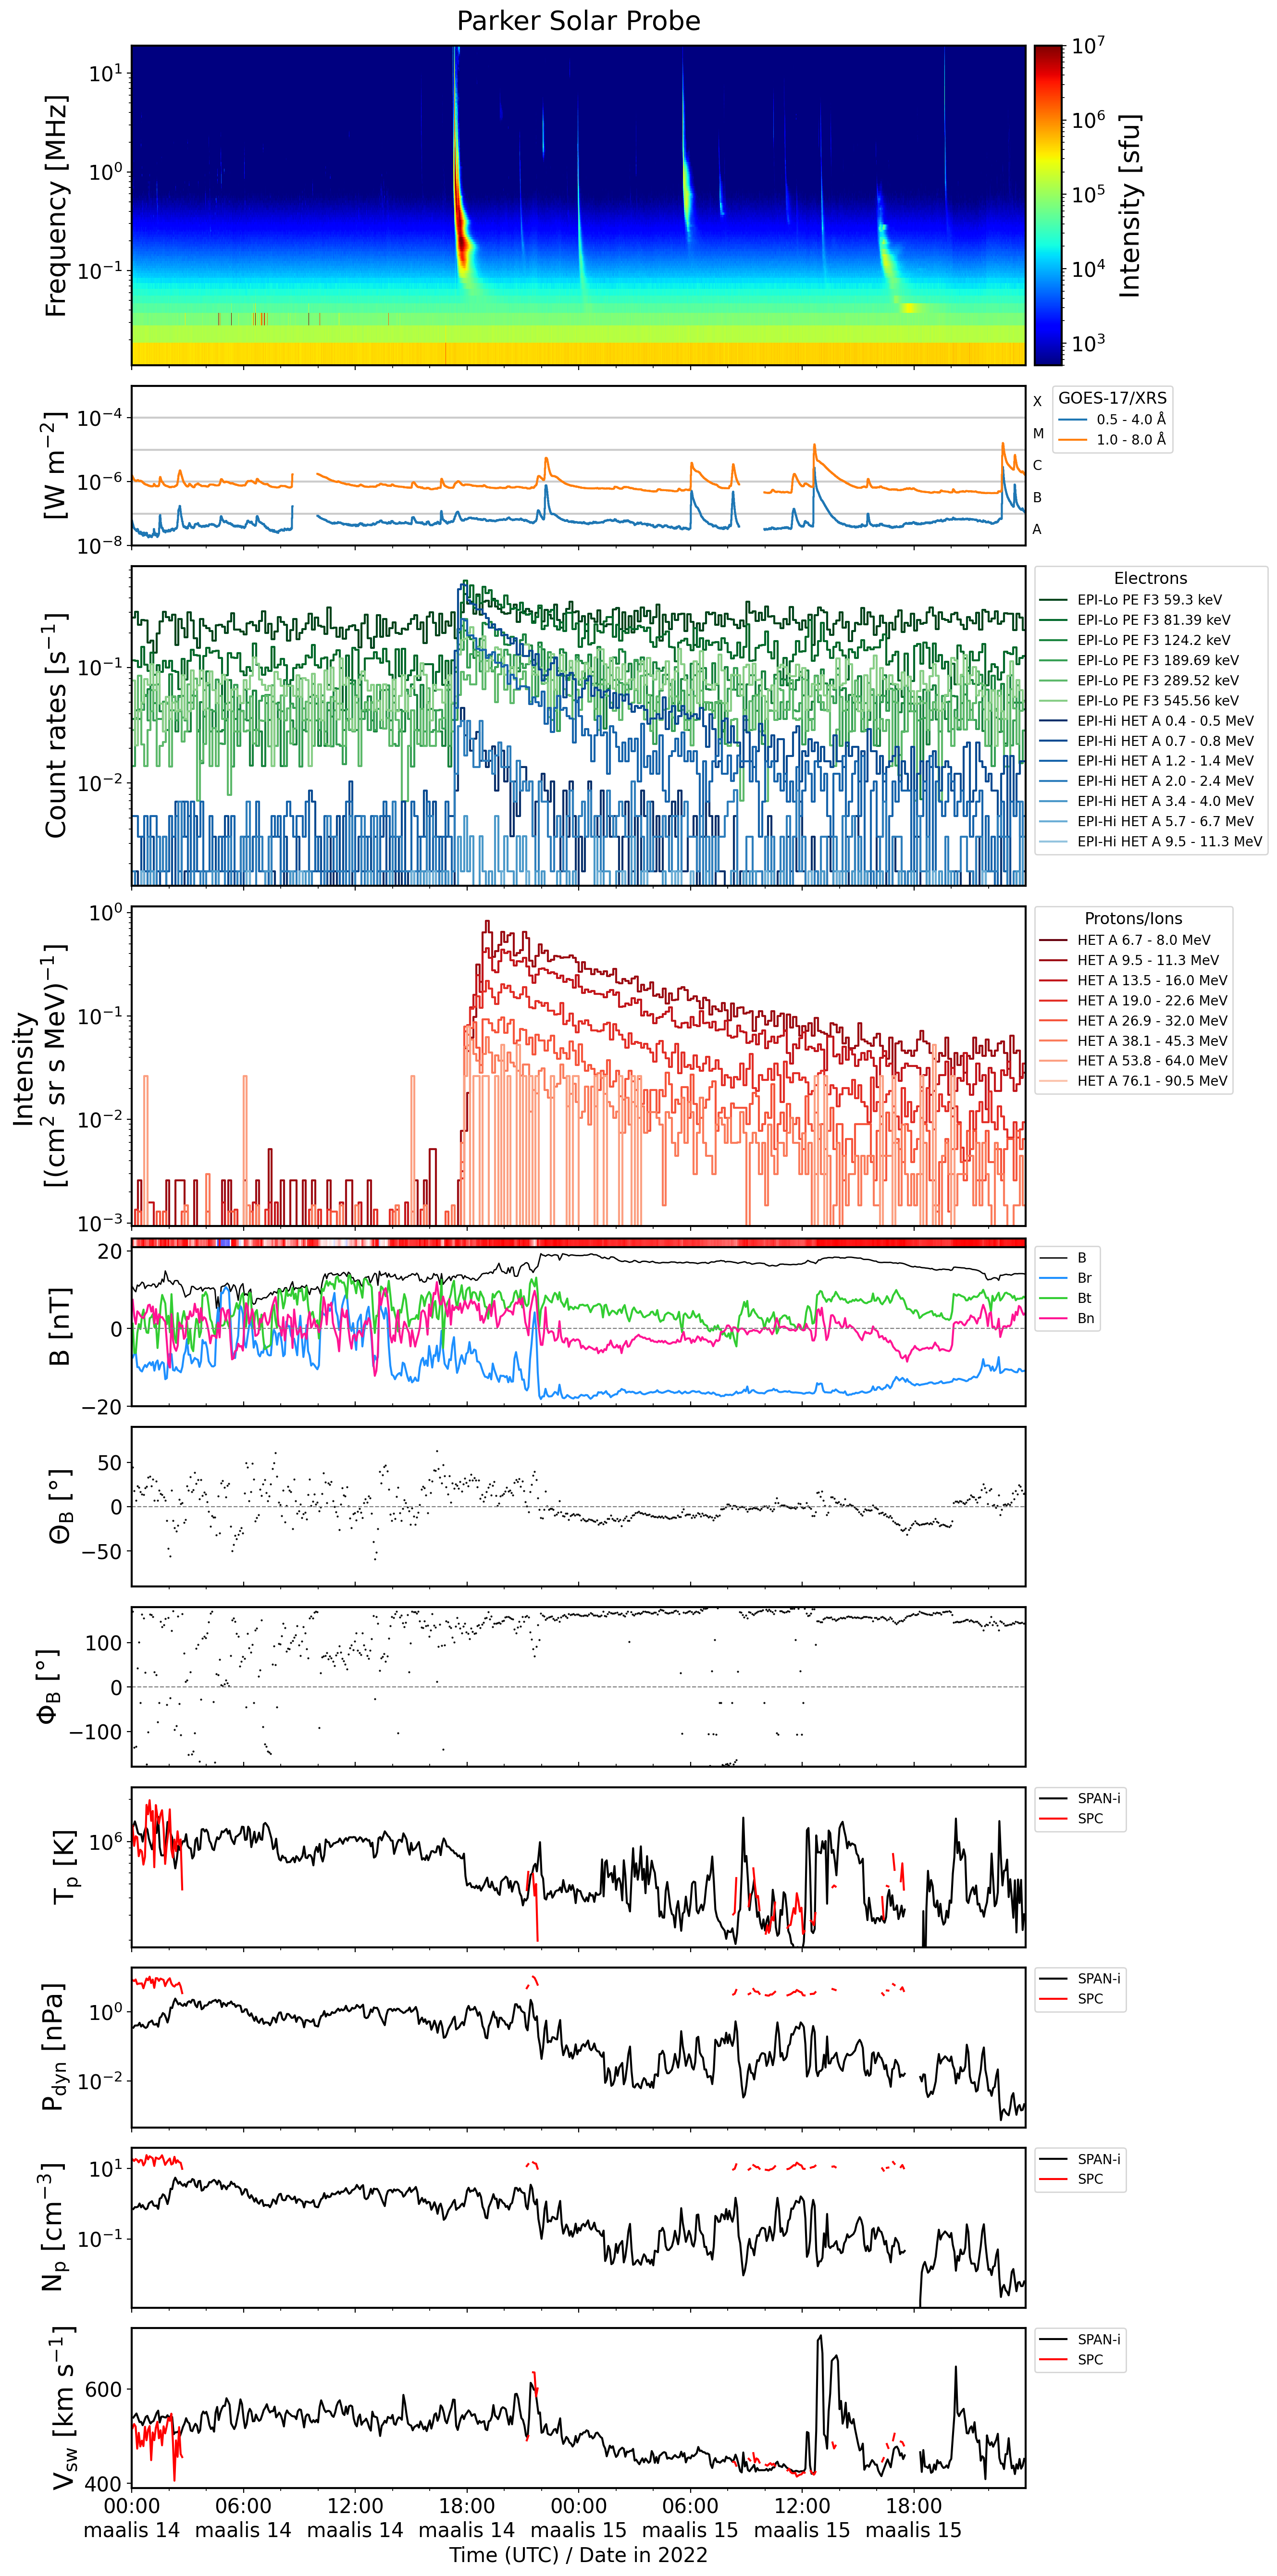

In [ ]:
fig, axs = m.make_plot()

## Edit the figure
For example, add a vertical line at a given datetime or a red-shaded region in the second last panel.

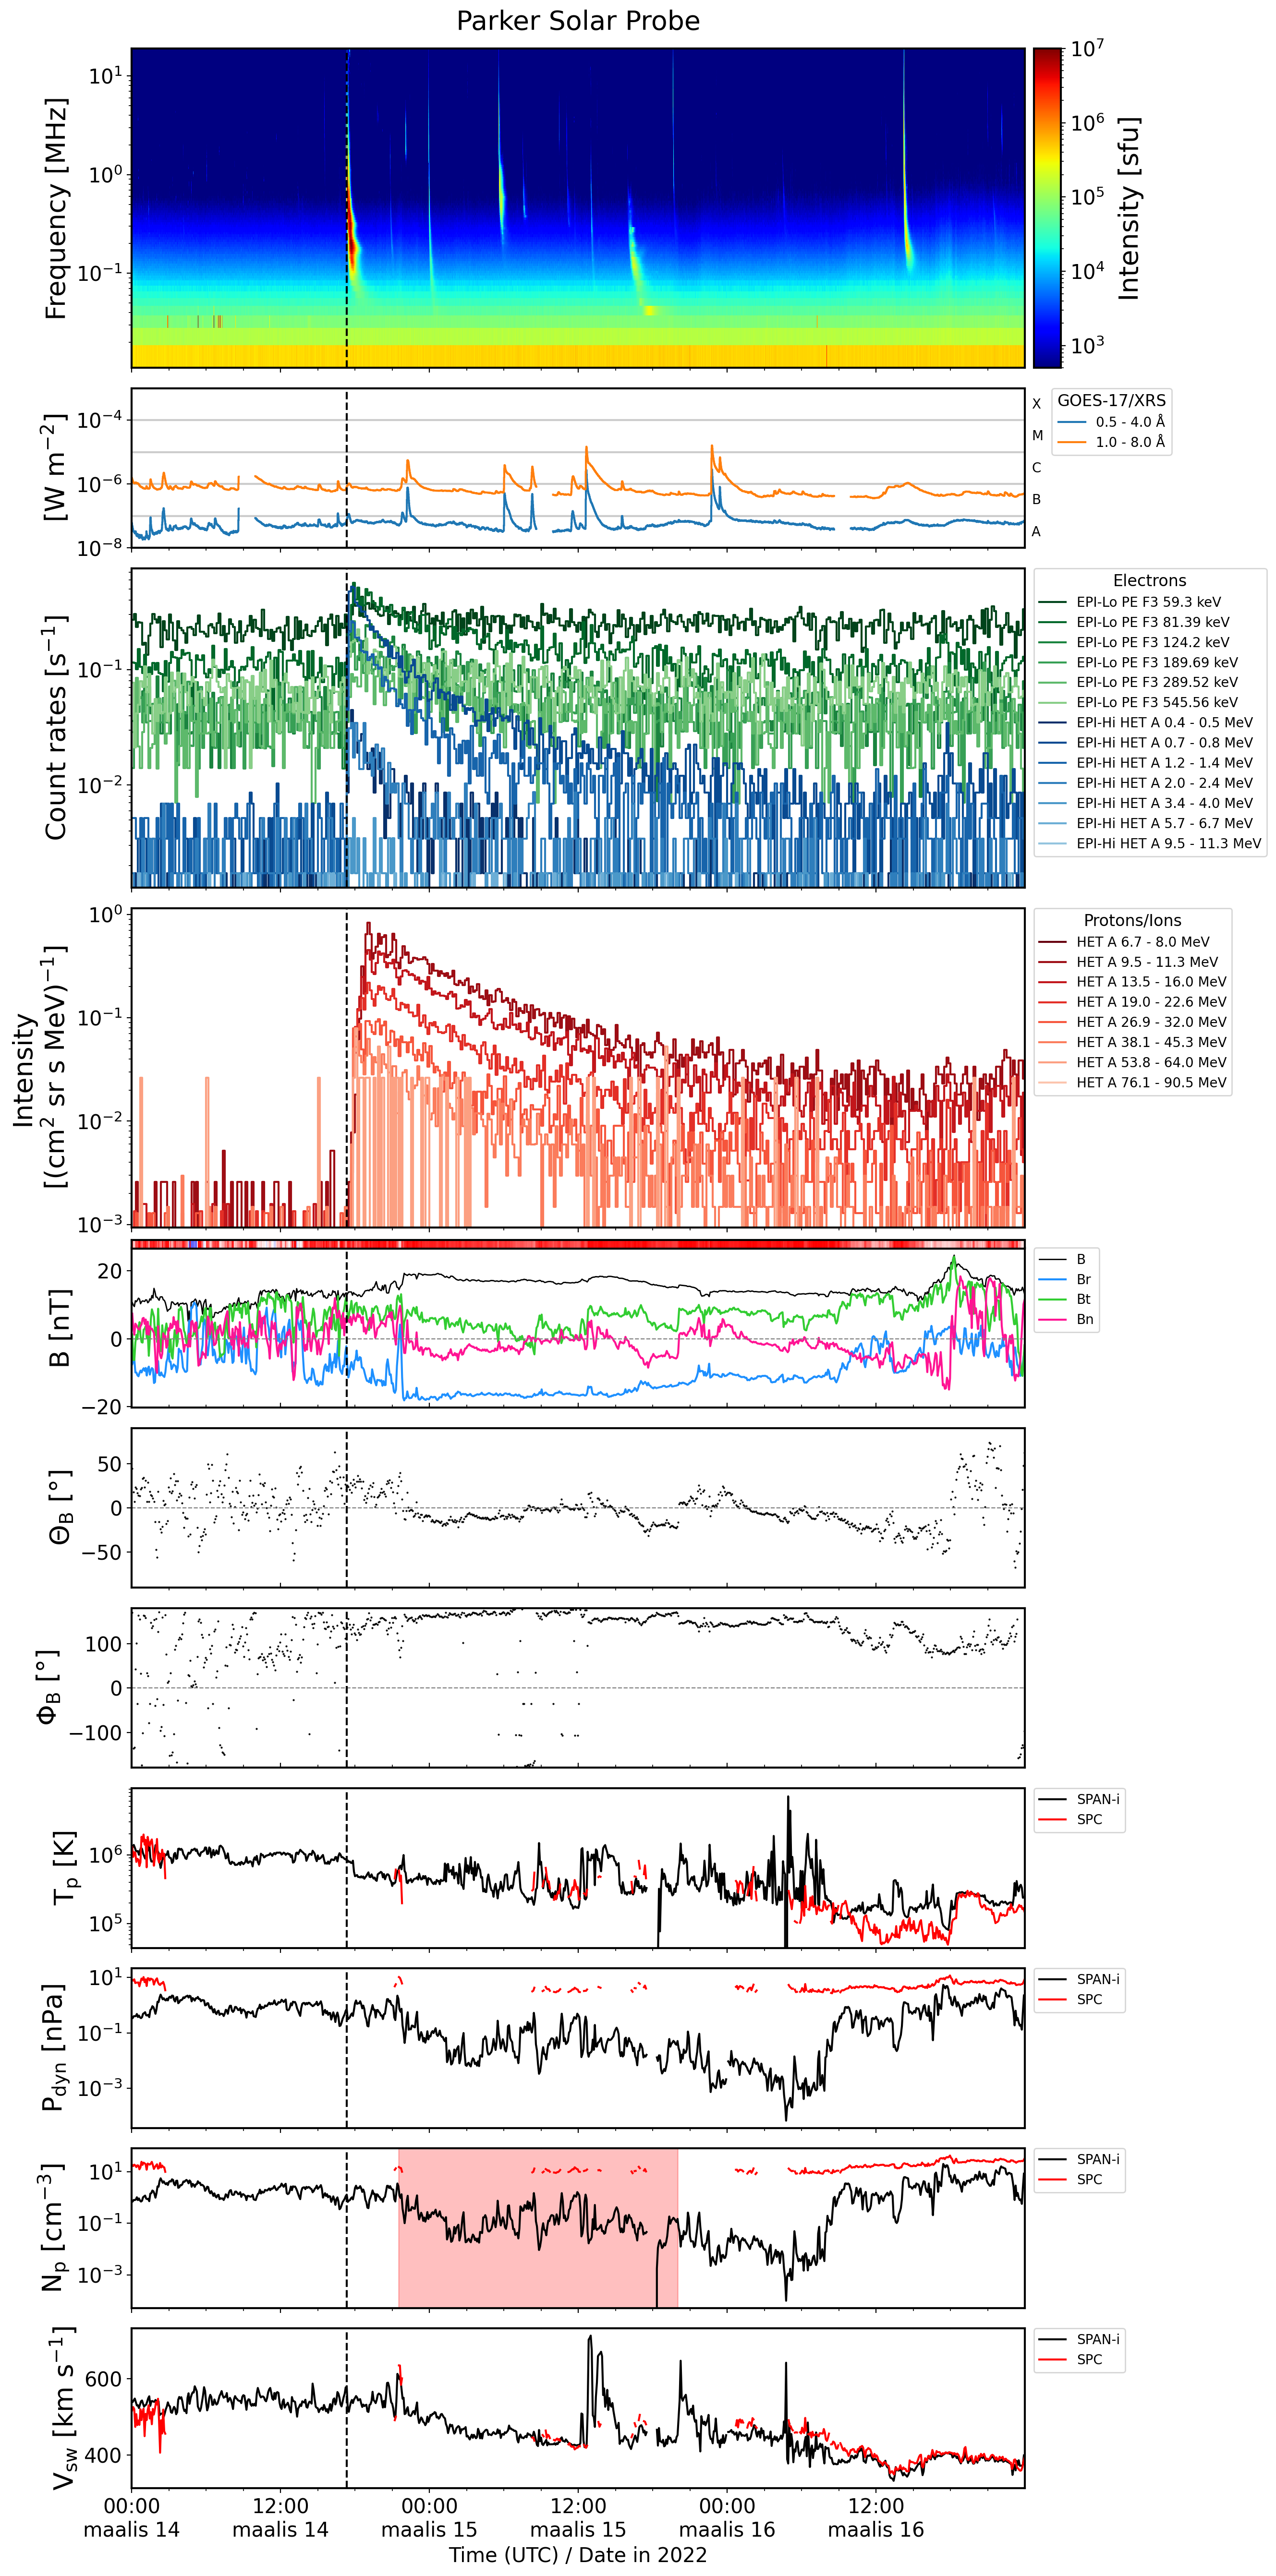

In [ ]:
from multi_inst_plots.other_tools import copy_fig_axs

fig_copy, axs_copy = copy_fig_axs(fig)

for ax in axs_copy:
    # vertical line
    ax.axvline(dt.datetime(2022, 3, 14, 17, 20), ls="--", c="k")

# shaded region
axs_copy[-2].axvspan(dt.datetime(2022, 3, 14, 21, 30), dt.datetime(2022, 3, 15, 20, 00), alpha=0.25, ec="r", fc="r", ls="-")

# show updated figure
fig_copy

### Saving figures

You can usually save a figure from the Notebook by right-clicking on it while holding down the ⇧ Shift key, then select "Save Image As..." (or similar). Alternatively, run the following cell.

In [ ]:
fig.savefig("SEP_multi-instrument_plot.png", bbox_inches="tight")